In [1]:
#import dependencies
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [5]:
data_file = "ResourcesFull/stats2015.csv"

df = pd.read_csv(data_file, encoding = "ISO-8859-1")

df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,YR,GMSCR
0,1,Quincy Acy\acyqu01,PF,25,SAC,59,29,14.8,2.0,3.6,...,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2,2015,4.26
1,2,Jordan Adams\adamsjo01,SG,21,MEM,2,0,7.5,1.0,3.0,...,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5,2015,0.65
2,3,Steven Adams\adamsst01,C,22,OKC,80,80,25.2,3.3,5.3,...,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0,2015,7.29
3,4,Arron Afflalo\afflaar01,SG,30,NYK,71,57,33.4,5.0,11.3,...,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8,2015,6.85
4,5,Alexis Ajinça\ajincal01,C,27,NOP,59,17,14.6,2.5,5.3,...,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0,2015,4.19


In [25]:
df = df.dropna()
df = df.drop(columns= ["Player", "Tm", "Pos", "3P%", "Rk", "YR"])
df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GMSCR
0,25,59,29,14.8,2.0,3.6,0.556,0.3,0.8,1.7,...,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2,4.26
1,21,2,0,7.5,1.0,3.0,0.333,0.0,0.5,1.0,...,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5,0.65
3,30,71,57,33.4,5.0,11.3,0.443,1.3,3.4,3.7,...,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8,6.85
4,27,59,17,14.6,2.5,5.3,0.476,0.0,0.0,2.5,...,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0,4.19
6,30,74,74,30.6,7.2,14.1,0.513,0.0,0.2,7.2,...,2.4,6.2,8.5,1.5,0.5,1.1,1.3,2.0,18.0,10.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,20,29,0,6.9,0.4,1.2,0.306,0.2,0.9,0.2,...,0.1,0.8,0.9,0.3,0.2,0.0,0.2,0.6,1.0,0.60
573,23,41,0,9.4,1.5,4.1,0.367,0.2,1.1,1.3,...,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8,1.76
574,30,54,2,19.1,2.3,6.9,0.339,1.4,4.4,0.9,...,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3,2.81
575,27,73,73,33.0,6.8,13.2,0.514,0.1,0.4,6.7,...,2.4,6.6,9.0,1.9,1.5,0.5,1.9,2.5,15.1,9.60


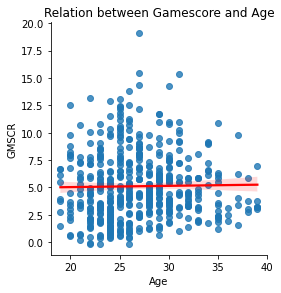

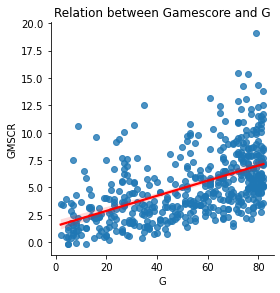

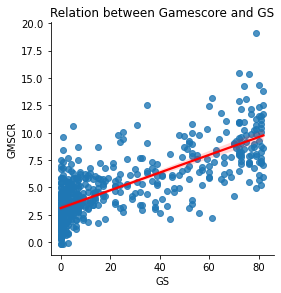

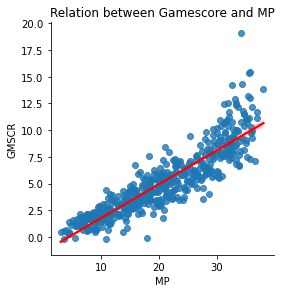

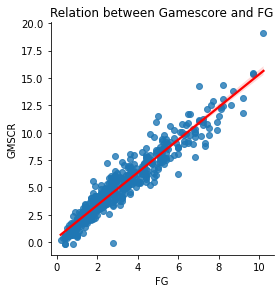

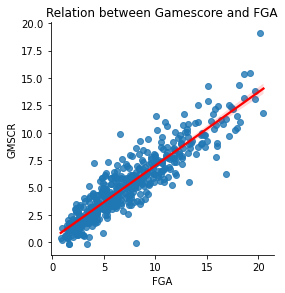

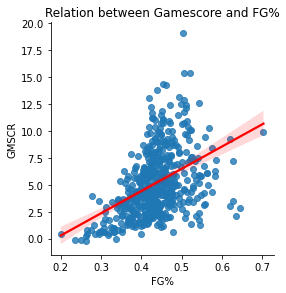

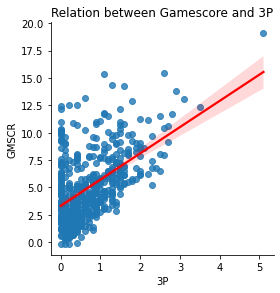

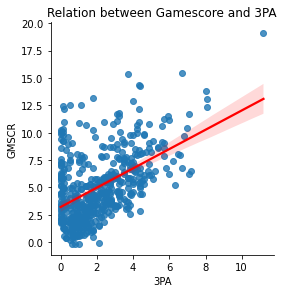

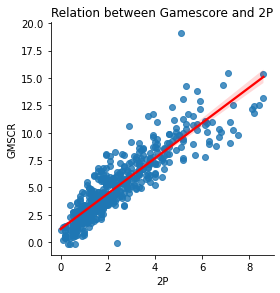

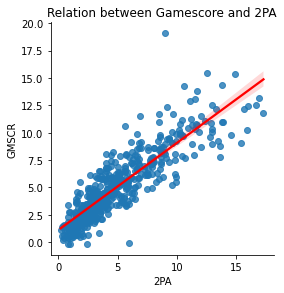

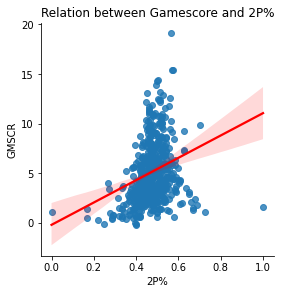

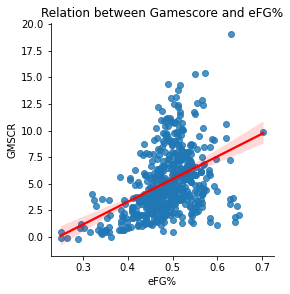

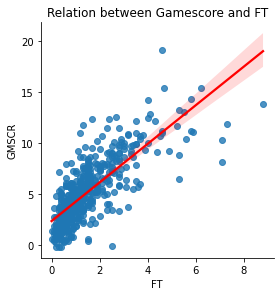

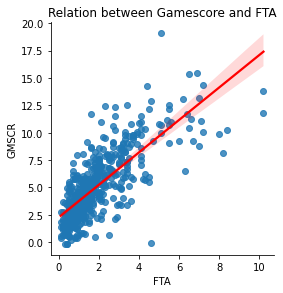

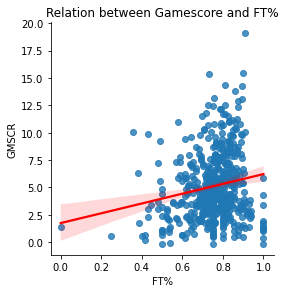

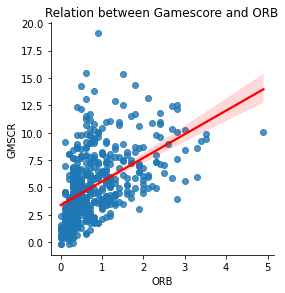

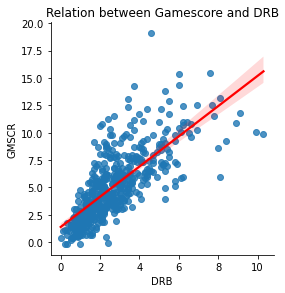

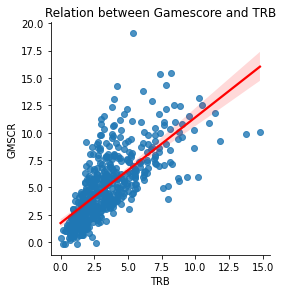

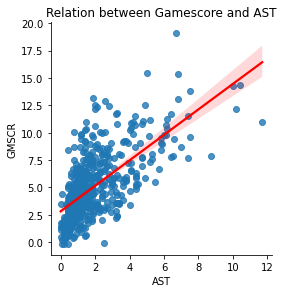

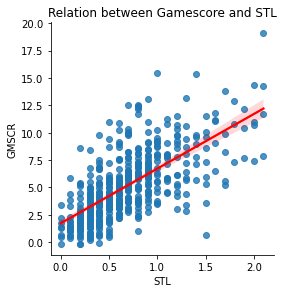

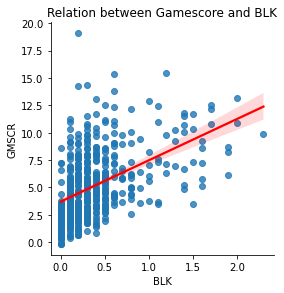

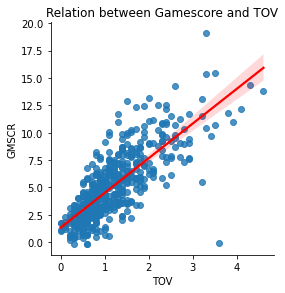

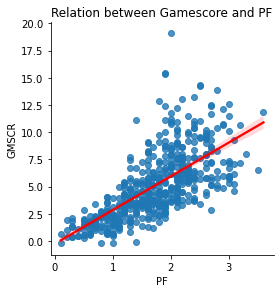

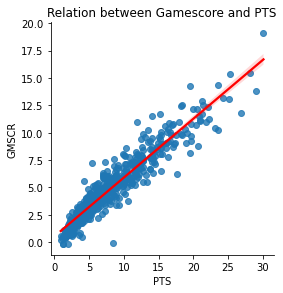

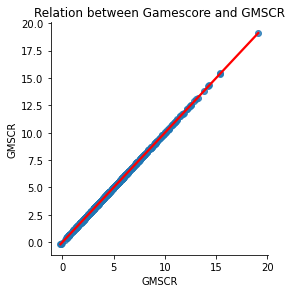

In [33]:
import seaborn as sbn
import matplotlib.pyplot as plt
features=df.columns

for i in features:
    sbn.lmplot(x=i, y="GMSCR", data=df,line_kws={'color': 'red'},size=4)
    text="Relation between Gamescore and " + i 
    plt.title(text)
    plt.show()

In [34]:
# Create our features
X = df.drop(["GMSCR"], axis = 1)

# Create our target
y = df['GMSCR']

In [36]:
X.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,26.843564,52.639604,24.619802,20.584356,3.159208,7.167723,0.433814,0.746535,2.147327,2.414455,...,0.752008,0.797822,2.694653,3.486931,1.965743,0.678020,0.371089,1.189505,1.728713,8.517624
std,4.347194,24.081641,28.706195,8.716198,1.985693,4.236445,0.066256,0.684836,1.765262,1.721909,...,0.122085,0.716012,1.674278,2.269210,1.749658,0.426331,0.392938,0.756735,0.687060,5.460183
min,19.000000,2.000000,0.000000,3.000000,0.200000,0.800000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.900000
25%,24.000000,31.000000,1.000000,14.200000,1.700000,3.900000,0.398000,0.200000,0.800000,1.100000,...,0.696000,0.300000,1.500000,1.900000,0.800000,0.400000,0.100000,0.700000,1.200000,4.300000
50%,26.000000,59.000000,9.000000,20.100000,2.700000,6.300000,0.433000,0.600000,1.800000,1.900000,...,0.764000,0.600000,2.300000,2.900000,1.400000,0.600000,0.300000,1.000000,1.800000,7.200000
75%,30.000000,75.000000,49.000000,28.100000,4.400000,9.800000,0.468000,1.100000,3.200000,3.300000,...,0.830000,1.100000,3.400000,4.500000,2.500000,0.900000,0.500000,1.500000,2.200000,11.700000
max,39.000000,82.000000,82.000000,38.100000,10.200000,20.500000,0.703000,5.100000,11.200000,8.600000,...,1.000000,4.900000,10.300000,14.800000,11.700000,2.100000,2.300000,4.600000,3.600000,30.100000


In [42]:
from sklearn.model_selection import train_test_split
#perform train test split since we know next year's gamescore for most data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [43]:
from sklearn import linear_model

In [44]:
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)
print(y_pred)

[ 2.13  4.97  5.38  2.27  3.93  5.54  8.63  7.33  3.86  1.    1.23  5.52
  1.02  5.48  5.3   7.88  3.39  6.95  6.11  3.19  5.33  5.21  1.28  3.53
  5.5   7.86  6.79  5.    4.55  4.19  5.84  7.21  2.36 11.22  5.8   4.56
  3.75 10.97  2.74  1.14  3.18 10.1   5.84 11.16  2.3   5.17  2.98  0.62
  1.08  3.63  9.11  7.29  5.19  4.94  2.75  2.62  7.93 11.49 -0.14  1.79
  3.75  5.78  2.81  3.57  9.25  3.5  15.37  3.49  3.41 11.52  6.22  2.36
  2.06  7.56 10.28  1.46  3.08  5.87 10.23  8.64  9.47 15.42  0.24  4.03
  5.52  0.63  3.79  9.89  2.27  3.29  3.74  2.8   0.46  5.95  8.7   1.79
  0.6   6.54  6.41  2.08  6.68  8.93  5.13  0.52  1.4   6.05  5.34  1.06
  7.25 19.12  9.7   1.29  8.    2.25  9.9   9.22  5.19  7.46  0.45  6.72
  3.06  5.33  8.04  2.1   5.41  2.47 11.71]


In [47]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

1.054601968527306e-27

In [48]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

1.0

Text(0, 0.5, 'Predicted')

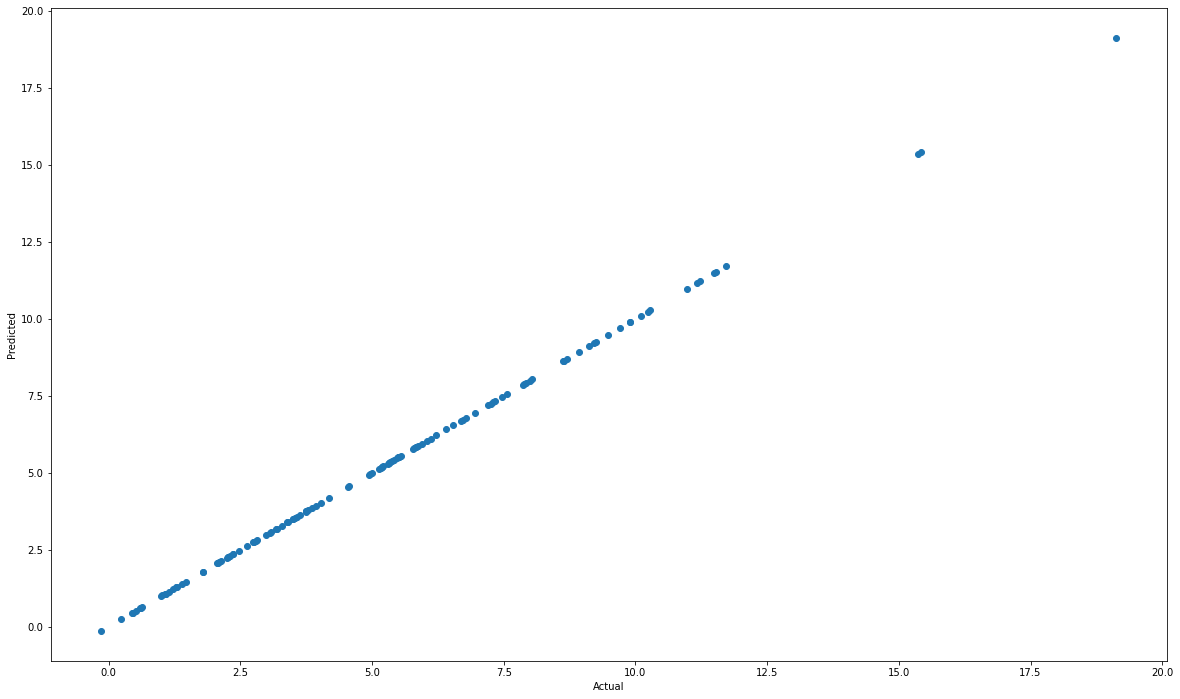

In [50]:
plt.figure(figsize=(20,12))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")